# Project Title: Alien Sightings/ Are Aliens Real? 

## Team Members: Nina Bryan (ninabry), Brielle Smith (bfsmith) and Kiley Price (kileyp)

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm # colormaps

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

## Read Datasets

In [2]:
merged_df = pd.read_csv("merged_df.csv")

In [3]:
merged_df[~merged_df['State'].isna()]

,lat_rounded,lon_rounded,Day,Month,Year,UFO_Sightings_Count,Region,Country,State,City,AvgTemperature,latitude,longitude
146,18.5,-66.1,30,6,2004,1,North America,US,Additional Territories,San Juan Puerto Rico,-99.0,18.460753,-66.115411
148,21.4,-157.9,6,12,2013,1,North America,US,Hawaii,Honolulu,74.9,21.368720,-157.939431
149,21.4,-157.9,7,12,2004,1,North America,US,Hawaii,Honolulu,76.0,21.368720,-157.939431
150,21.4,-157.9,23,11,2012,1,North America,US,Hawaii,Honolulu,73.6,21.368720,-157.939431
151,21.4,-157.9,30,9,1999,1,North America,US,Hawaii,Honolulu,78.9,21.368720,-157.939431
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,47.5,-111.3,25,1,2005,1,North America,US,Montana,Great Falls,44.1,47.505038,-111.302116
4285,47.5,-111.3,26,8,1999,1,North America,US,Montana,Great Falls,75.5,47.505038,-111.302116
4286,47.5,-111.3,26,11,2008,1,North America,US,Montana,Great Falls,40.9,47.505038,-111.302116
4287,47.5,-111.3,29,12,2001,1,North America,US,Montana,Great Falls,9.0,47.505038,-111.302116


In [4]:
merged_df2 = pd.read_csv("merged_df2.csv")

/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/2365545286.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df2 = pd.read_csv("merged_df2.csv")


In [5]:
merged_df2.head()

,datetime,city,state,country,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude,...,days_between,Day,Month,Year,Day_Night,lat_rounded,lon_rounded,Year_published,Total_Alien_Books,Total_Meteorites
0,1949-10-10 20:30:00,san marcos,tx,us,2700.0,45 minutes,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,...,19922,10,10,1949,Unknown,29.9,-97.9,NaN,NaN,22.0
1,1949-10-10 21:00:00,lackland afb,tx,NaN,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.384210,-98.581082,...,20520,10,10,1949,Unknown,29.4,-98.6,NaN,NaN,22.0
2,1955-10-10 17:00:00,chester (uk/england),NaN,gb,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.200000,-2.916667,...,19095,10,10,1955,Unknown,53.2,-2.9,1955.0,1.0,23.0
3,1956-10-10 21:00:00,edna,tx,us,20.0,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,...,17264,10,10,1956,Unknown,29.0,-96.6,NaN,NaN,26.0
4,1960-10-10 20:00:00,kaneohe,hi,us,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,...,15808,10,10,1960,Unknown,21.4,-157.8,NaN,NaN,28.0


# Part I: Preprocessing

In [6]:
merged_df2.country.value_counts(normalize=True)

country
us    0.921795
ca    0.042458
gb    0.026775
au    0.007493
de    0.001479
Name: proportion, dtype: float64

In [7]:
# subselect US sightings
df = merged_df2[merged_df2.country == 'us']

# drop columns: comment, city, duration (hours/min), date posted, country, and year published
# since they are strings, mixed-types, not normalized, contants or repetitive
df.drop(columns=['city', 'duration (hours/min)', 'country', 'date posted', 'Year_published'], inplace=True)

/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/2061093012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['city', 'duration (hours/min)', 'country', 'date posted', 'Year_published'], inplace=True)


Based on our dataset from parts I and II, we have chosen to only consider UFO sightings from the US. Although this method of subselecting eliminates some row, we maintain approximately 92% of our data set and therefore have a sufficiently large dataset of over 64,000 records. Additionally, tightening the scope of our data leaves us with fewer null values to handle and therefore a lessened risk of simulating inaccurate data. Subselecting our data on this criterion also allows us to drop the country columns since all records in our new DataFrame are from the same country. 

Furthermore, we decided to eliminate our year released and date posted columns since the information is already expressed in distinct month, day and year columns. Similarly, we dropped the duration (hours/min) column since it included mixed data types and similar information can be found in the duration (seconds) column. Finally, we decided to drop city the feature is categorical and contains too many unique values to effectively represent via one-hot encoding.

## Feature Engineering

Applying various preprocessing techniques such as feature scaling, feature engineering, one-hot encoding and handling categorical variables results in a dataset more suitable for dimensionality reduction and machine learning techniques. 

UFO shape is already one-hot encoded from previous data manipulation in part I, however, we will cast our shape columns as 0s and 1s instead of boolean values to accommodate machine learning. 

In [8]:
# convert shape columns to ints instead of bools
for column in df.columns:
    if df[column].dtype == bool:
        df[column] = df[column].astype(int)

/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/3059176602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)
/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/3059176602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)
/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/3059176602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

One-hot encoding the state column would result in 49 additional features. To avoid this extreme jump in dimensionality, we have chosen to initialize a new feature called region to aggregate 50 states into 9 categories which represent what geographical area of the country where each event took place. We then proceed to drop our state column before continuing. 

In [9]:
# make a column for 9 regions of us instead of one hot encoding all 50 states

# New England (Connecticut, Maine, Massachusetts, New Hampshire, Rhode Island, and Vermont)
new_england = ['ct', 'me', 'ma', 'nh', 'ri', 'vt']
df.loc[df['state'].isin(new_england), 'Region'] = 'New England'

#  Middle Atlantic (New Jersey, New York, and Pennsylvania)
mid_atl = ['nj', 'ny', 'pa']
df.loc[df['state'].isin(mid_atl), 'Region'] = 'Mid Atlantic'

# East North Central (Illinois, Indiana, Michigan, Ohio, and Wisconsin)
e_north_cent = ['il', 'in', 'mi', 'oh', 'wi']
df.loc[df['state'].isin(e_north_cent), 'Region'] = 'East North Central'

# West North Central (Iowa, Kansas, Minnesota, Missouri, Nebraska, North Dakota, and South Dakota)
w_north_cent = ['ia', 'ks', 'mn', 'mo', 'ne', 'nd', 'sd']
df.loc[df['state'].isin(w_north_cent), 'Region'] = 'West North Central'

# South Atlantic (Delaware, Florida, Georgia, Maryland, North Carolina, South Carolina, Virginia, Washinton DC and West Virginia)
south_atl = ['de', 'fl', 'ga', 'md', 'nc', 'sc', 'va', 'wv', 'dc']
df.loc[df['state'].isin(south_atl), 'Region'] = 'South Atlantic'

# East South Central (Alabama, Kentucky, Mississippi, and Tennessee)
e_south_cent = ['al', 'ky', 'ms', 'tn']
df.loc[df['state'].isin(e_south_cent), 'Region'] = 'East South Central'

# West South Central (Arkansas, Louisiana, Oklahoma, and Texas)
w_south_cent = ['ar', 'la', 'ok', 'tx']
df.loc[df['state'].isin(w_south_cent), 'Region'] = 'West South Central'

# Mountain (Arizona, Colorado, Idaho, Montana, Nevada, New Mexico, Utah, and Wyoming)
mountain = ['az', 'co', 'id', 'mt', 'nv', 'nm', 'ut', 'wy' ]
df.loc[df['state'].isin(mountain), 'Region'] = 'Mountain'

# Pacific (Alaska, California, Hawaii, Oregon, and Washington)
pacific = ['ak', 'ca', 'hi', 'or', 'wa']
df.loc[df['state'].isin(pacific), 'Region'] = 'Pacific'

# drop state
df.drop(columns = 'state', inplace=True)

/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/4060514743.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['state'].isin(new_england), 'Region'] = 'New England'
/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/4060514743.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = 'state', inplace=True)


Similar to city, the comment feature is a categorical variable that contains too many many unique values to effectively represent via one-hot encoding; however, we gleaned from our natural language processing in part I that the word "light" appears to be the most frequently (~17500) occurring word among the comments, followed closely by "lights" suggesting that many comments may be describing sightings involving lights. To capture this information, we will create an indicator variable that expresses whether each comment contained the word light or lights and then remove the comment column.

In [10]:
# add 'contains_light' column, fill NaN with 0, and convert to integers
df['contains_light'] = df['comments'].str.contains(r'\blight\b|\blights\b', case=False, regex=True).fillna(0).astype(int)

df.drop(columns = 'comments', inplace=True)

/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/2074100805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contains_light'] = df['comments'].str.contains(r'\blight\b|\blights\b', case=False, regex=True).fillna(0).astype(int)
/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/2074100805.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = 'comments', inplace=True)


Additionally, there may be some information held in the day of the week in which a sighting occurred thus we will instantiate a new variable to represent the day of the week ordinally from 0 (Monday) to 6 (Sunday).  Similar to above, we will proceed to drop the datetime column as it contains redundant information that can be found elsewhere in the dataset.

In [11]:
# add day of week column
df['datetime'] = pd.to_datetime(df['datetime'])
df['day_of_week_numeric'] = df['datetime'].dt.dayofweek

df.drop(columns = 'datetime', inplace=True)

/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/2285132037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df['datetime'])
/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/2285132037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week_numeric'] = df['datetime'].dt.dayofweek
/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/2285132037.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [12]:
df

,duration (seconds),latitude,longitude,shape_changed,shape_changing,shape_chevron,shape_cigar,shape_circle,shape_cone,shape_crescent,...,Month,Year,Day_Night,lat_rounded,lon_rounded,Total_Alien_Books,Total_Meteorites,Region,contains_light,day_of_week_numeric
0,2700.0,29.883056,-97.941111,0,0,0,0,0,0,0,...,10,1949,Unknown,29.9,-97.9,NaN,22.0,West South Central,0,0
3,20.0,28.978333,-96.645833,0,0,0,0,1,0,0,...,10,1956,Unknown,29.0,-96.6,NaN,26.0,West South Central,0,2
4,900.0,21.418056,-157.803611,0,0,0,0,0,0,0,...,10,1960,Unknown,21.4,-157.8,NaN,28.0,Pacific,0,0
5,300.0,36.595000,-82.188889,0,0,0,0,0,0,0,...,10,1961,Unknown,36.6,-82.2,2.0,27.0,East South Central,0,1
7,1200.0,41.117500,-73.408333,0,0,0,0,0,0,0,...,10,1965,Unknown,41.1,-73.4,1.0,49.0,New England,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79946,600.0,36.165833,-86.784444,0,0,0,0,0,0,0,...,9,2013,Unknown,36.2,-86.8,100.0,11.0,East South Central,0,0
79947,1200.0,43.613611,-116.202500,0,0,0,0,1,0,0,...,9,2013,Unknown,43.6,-116.2,100.0,11.0,Mountain,1,0
79948,1200.0,38.297222,-122.284444,0,0,0,0,0,0,0,...,9,2013,Unknown,38.3,-122.3,100.0,11.0,Pacific,0,0
79949,5.0,38.901111,-77.265556,0,0,0,0,1,0,0,...,9,2013,Unknown,38.9,-77.3,100.0,11.0,South Atlantic,0,0


## Clean Data

Now that we have our added and modified our features, we will prepare the dataset for machine learning via handling missing values, inconsistencies, and any other issues we may encounter. 

In [13]:
df.isna().sum()

duration (seconds)        0
latitude                  0
longitude                 0
shape_changed             0
shape_changing            0
shape_chevron             0
shape_cigar               0
shape_circle              0
shape_cone                0
shape_crescent            0
shape_cross               0
shape_cylinder            0
shape_delta               0
shape_diamond             0
shape_disk                0
shape_dome                0
shape_egg                 0
shape_fireball            0
shape_flare               0
shape_flash               0
shape_formation           0
shape_hexagon             0
shape_light               0
shape_other               0
shape_oval                0
shape_pyramid             0
shape_rectangle           0
shape_round               0
shape_sphere              0
shape_teardrop            0
shape_triangle            0
shape_unknown             0
days_between              0
Day                       0
Month                     0
Year                

### Handle Nulls - Total Alien Book Count

All of the records with null total alien book counts are from years before 1980. Given this information, we can investigate the distribution of alien book releases before 1980 to determine the best way to impute these missing values.

In [14]:
# years with null total alien book counts
df[df['Total_Alien_Books'].isna()]['Year'].sort_values().unique()

array([1910, 1920, 1925, 1929, 1931, 1934, 1937, 1939, 1941, 1942, 1944,
       1945, 1946, 1947, 1948, 1949, 1952, 1954, 1956, 1960, 1964, 1975,
       1978])

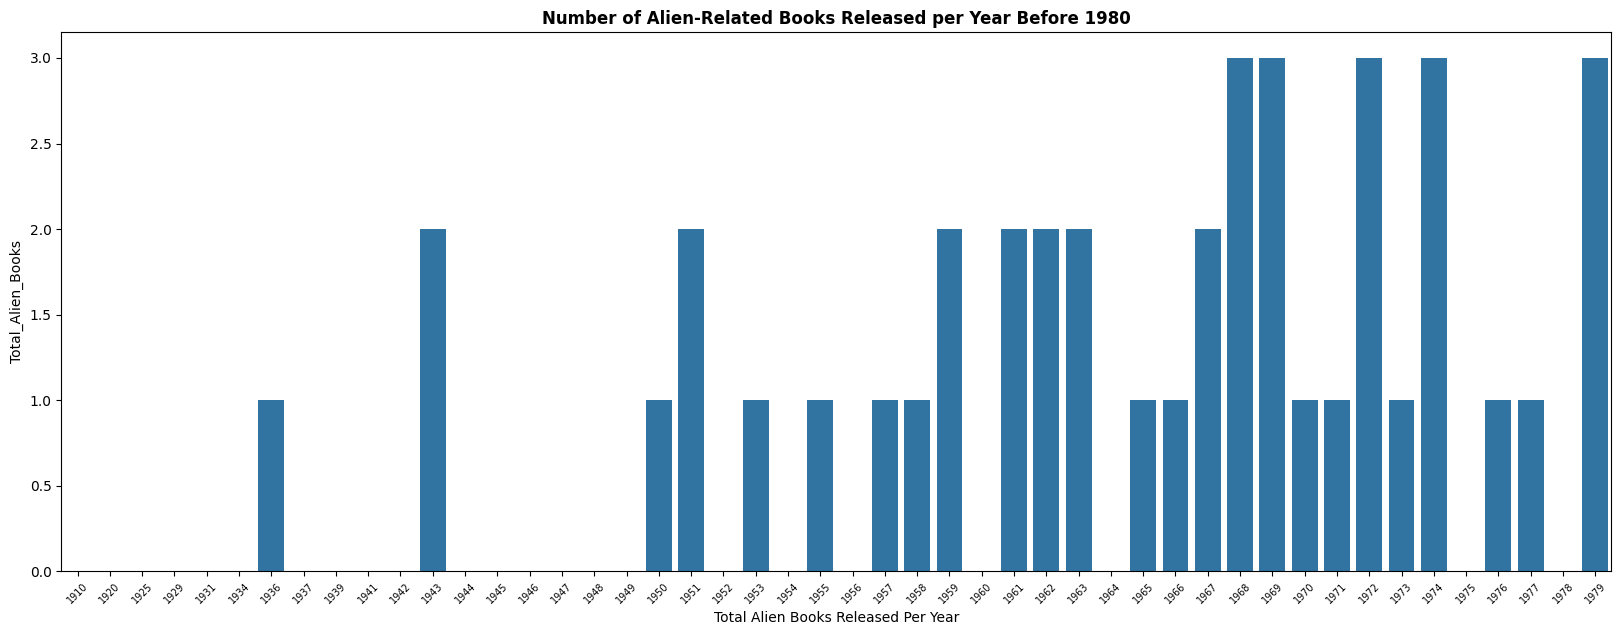

In [15]:
# plot distribution of alien-related books after 1960
fig = plt.subplots(figsize=(20, 7))
plot = sns.barplot(x='Year', y='Total_Alien_Books', data=df[df.Year < 1980])
plot.set_xticks(ticks = plot.get_xticks(), labels = plot.get_xticklabels(), rotation=45, fontsize = 'x-small')
plot.set_xlabel('Total Alien Books Released Per Year')
_ = plot.set_title('Number of Alien-Related Books Released per Year Before 1980', fontdict = {'size': 12, 'weight':'bold'})

In [16]:
# total number of alien books ranged from 1 to 3 before 1980; the majority of the years released 1
df[df['Year'] < 1980][['Year', 'Total_Alien_Books']].drop_duplicates()['Total_Alien_Books'].value_counts()

Total_Alien_Books
1.0    13
2.0     7
3.0     5
Name: count, dtype: int64

We could impute all the missing values with 0, a measure of central tendency or a random assignment. As shown above, over half of the years before 1980 only released one total alien book. Since the range of alien-related books released prior to 1980 ranges from 1 to 3, we feel confident in our decision to fill missing values with the median number of alien books released before 1980.

In [17]:
# impute missing null values for alien books with median
df['Total_Alien_Books'].fillna(df['Total_Alien_Books'].median(), inplace=True)

/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/4155512540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Alien_Books'].fillna(df['Total_Alien_Books'].median(), inplace=True)


### Handle Nulls - Total Meteorite Count

In [18]:
# look at total meteorite counts for each year in dataset
df[['Year', 'Total_Meteorites']].drop_duplicates().sort_values('Year')

,Year,Total_Meteorites
10538,1910,20.0
46467,1920,14.0
20845,1925,17.0
62464,1929,15.0
26415,1931,20.0
...,...,...
212,2010,1005.0
230,2011,713.0
243,2012,234.0
264,2013,11.0


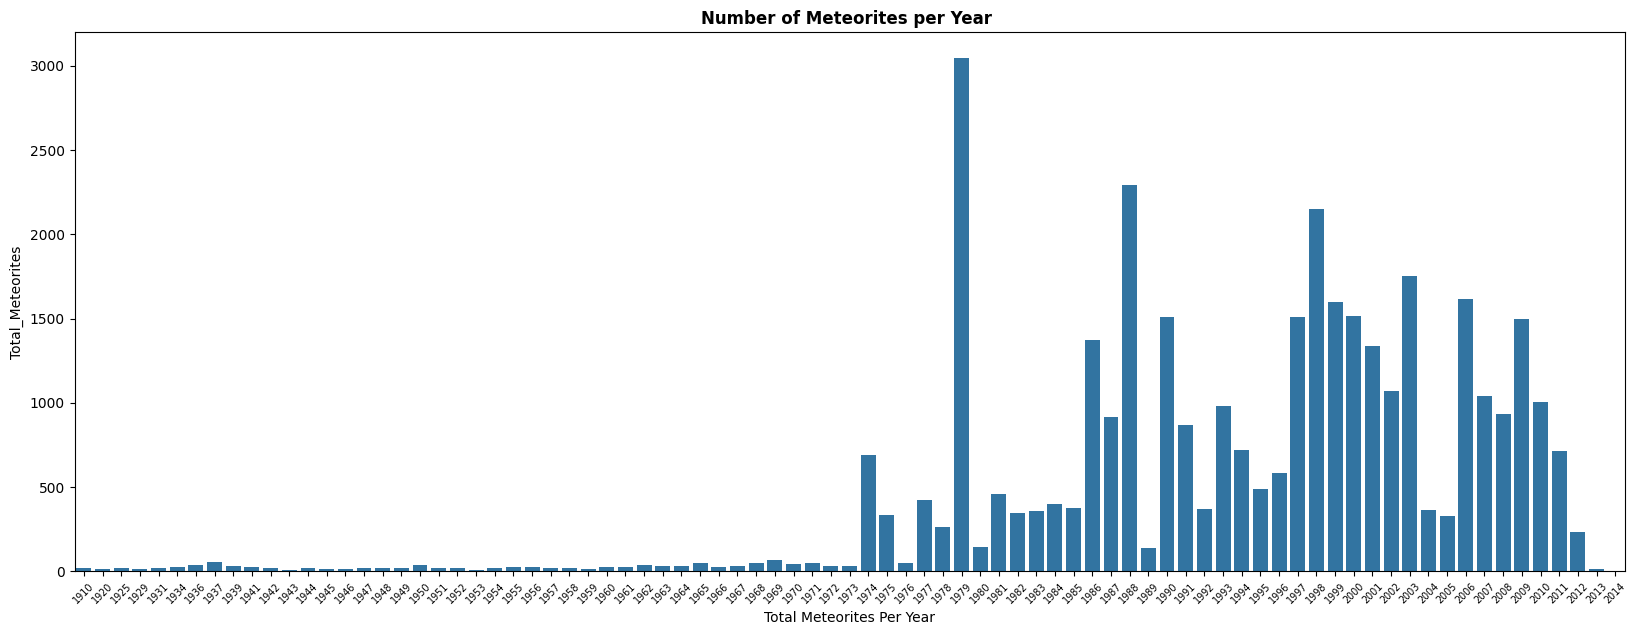

In [19]:
# plot distribution of meteorites per year
fig = plt.subplots(figsize=(20, 7))
plot = sns.barplot(x='Year', y='Total_Meteorites', data=df)
plot.set_xticks(ticks = plot.get_xticks(), labels = plot.get_xticklabels(), rotation=45, fontsize = 'x-small')
plot.set_xlabel('Total Meteorites Per Year')
_ = plot.set_title('Number of Meteorites per Year ', fontdict = {'size': 12, 'weight':'bold'})

In [20]:
# years with null total meteorite counts
df[df['Total_Meteorites'].isna()]['Year'].sort_values().unique()

array([2014])

The only records with null total annual meteorite counts are from 2014. Upon looking at the shape and distribution of total meteorites per year among the entire data set, it is difficult to establish a definite trend. Although the number of total meteorites seems to be on the decline based on the previous 4 years (2019-2013), this pattern is not consistent upon looking at a wider window of years such as 2000 to 2013. Instead of trying to predict a somewhat unpredictable pattern, we will impute our missing meteorite count from 2014 with the mean value.

## Preprocess Data

In [21]:
# Identify numeric columns and categorical columns as before
numeric_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and not col.startswith('shape_')]
categorical_cols = [col for col in df.columns if df[col].dtype == 'object' and not col.startswith('shape_')]
df[categorical_cols] = df[categorical_cols].astype(str)

# Set up your pipelines and ColumnTransformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# Fit and transform the data
df_transformed = preprocessor.fit_transform(df)

# If df_transformed is a sparse matrix, convert it to a dense matrix
if hasattr(df_transformed, "toarray"):
    df_transformed = df_transformed.toarray()

# Generate column names for the transformed data
numeric_features = numeric_cols  # Unchanged numeric features
categorical_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_features = numeric_features + list(categorical_features) + [col for col in df.columns if col not in numeric_cols + categorical_cols]

# Finally, create your DataFrame
df_transformed = pd.DataFrame(df_transformed, columns=all_features)

/var/folders/gn/xs6rswrn0ds7s2k9gsv3k3dr0000gn/T/ipykernel_11752/2662599445.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = df[categorical_cols].astype(str)


Imputing instead of dropping null values allows us to maintain the size of our data, thus providing machine learning techniques with more information to learn. Here, we thoughtfully chose to fill alien books and total meteorite counts with reasonable values in attempt to mimic what might have actually occurred. Filling NAs haphazardly or neglecting to consider how to impute missing values based on other features may lead to erroneous data or false patterns that can impact our model's performance. Our pipelines also apply simple imputers to categorical variables. Although not necessary with our dataset, it is good practice to ensure once more that we have no missing values since most ML algorithms require a complete dataset to function properly and may not execute if any inputs contain nulls. 

Apart from imputing missing values, we performed one hot encoding for categorical variables and scaled numeric variables. We chose one-hot encoding since PCA can only be applied to numeric values and representing each category as a separate binary feature, rather than a singular feature of multiple integers, prevents the introduction of false ordinality. Alternatively, we scaled our numeric variables since PCA identifies the axes that maximize the variance in the data thus if features have different scales, the variable with the largest scale can disproportionately influence the principal components.

## Dimensionality Reduction

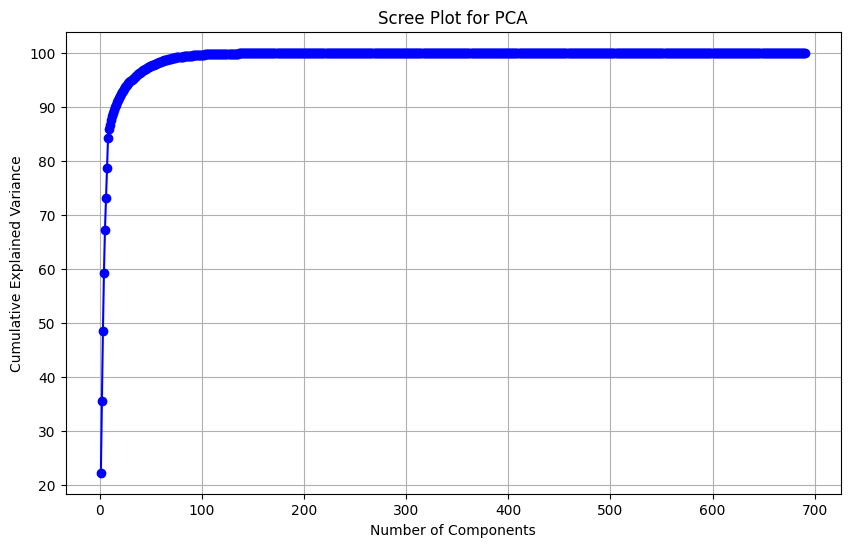

22.34% of cumulative variance is explained by the first 1 components
35.65% of cumulative variance is explained by the first 2 components
48.46% of cumulative variance is explained by the first 3 components
59.34% of cumulative variance is explained by the first 4 components
67.23% of cumulative variance is explained by the first 5 components
73.06% of cumulative variance is explained by the first 6 components
78.73% of cumulative variance is explained by the first 7 components
84.18% of cumulative variance is explained by the first 8 components
85.80% of cumulative variance is explained by the first 9 components
86.69% of cumulative variance is explained by the first 10 components
87.51% of cumulative variance is explained by the first 11 components
88.22% of cumulative variance is explained by the first 12 components
88.87% of cumulative variance is explained by the first 13 components
89.42% of cumulative variance is explained by the first 14 components
89.91% of cumulative variance

In [22]:
# Initialize PCA without specifying the number of components to retain all components
pca = PCA()

# Perform PCA on the transformed data
prepared_X = pca.fit_transform(df_transformed)

# Calculate the percentage of variance explained by each component
variance_ratios = pca.explained_variance_ratio_
cumulative_variance = variance_ratios.cumsum() * 100

# Creating the scree plot for explained variance
plt.figure(figsize=(10, 6))
components = range(1, len(variance_ratios) + 1)
plt.plot(components, cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Scree Plot for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Optional: Display the exact percentage of cumulative variance explained by each component
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f'{cum_var:.2f}% of cumulative variance is explained by the first {i} components')

Selecting the optimal number of components in PCA is a strategic decision that balances between maximizing variance explained and minimizing complexity. Considering the provided cumulative variance data, opting for 20 components seems judicious. By the first 20 components, 91.95% of the cumulative variance is explained, offering a substantial portion of the dataset's information. This choice is particularly reasonable because subsequent increases in the number of components yield diminishing returns in terms of additional variance explained. For example, moving from 20 to 40 components only adds approximately 5.51% more explained variance, suggesting that the first 20 components capture the majority of useful information. Therefore, selecting 20 components provides a robust model that efficiently captures the significant patterns of the data without unnecessary complexity, making it an optimal balance for many practical applications.

In [23]:
# PCA for 4 dimensions
pca = PCA(n_components=20)

# perform 4D PCA on transformed data
#scaled_X = scale_pipe.fit_transform(X)
prepared_X = pca.fit_transform(df_transformed)

# calculate percentage of variance retained for four components
for i, value in enumerate(pca.explained_variance_ratio_):
  print(f'{round(value * 100,2)}% of variance is retained by '
        + f'principal component #{i+1}')

22.34% of variance is retained by principal component #1
13.31% of variance is retained by principal component #2
12.81% of variance is retained by principal component #3
10.88% of variance is retained by principal component #4
7.89% of variance is retained by principal component #5
5.82% of variance is retained by principal component #6
5.68% of variance is retained by principal component #7
5.44% of variance is retained by principal component #8
1.63% of variance is retained by principal component #9
0.89% of variance is retained by principal component #10
0.82% of variance is retained by principal component #11
0.7% of variance is retained by principal component #12
0.65% of variance is retained by principal component #13
0.55% of variance is retained by principal component #14
0.49% of variance is retained by principal component #15
0.47% of variance is retained by principal component #16
0.42% of variance is retained by principal component #17
0.39% of variance is retained by prin

# Part II: Clustering Analysis 

## Goal + Justification

With our collection of data, we understand there to be some form of structure or pattern. In this case, we believe there is a pattern among UFO sightings in the US and have entertained various explanations for these seemingly stochastic phenomenon such as meteorites, weather patterns and the prevalence of aliens in pop culture;  however, we do not know what combination of these features may relate and to what degree. Since we do not have known labels associated with the events in our data such as "UFO sighting occurred" versus "UFO sighting did not occur", we have decided to perform cluster analysis to gain insight into our unsupervised learning problem and determine what patterns exist between UFO sightings.

## Clustering Methods

### Agglomerative Clustering

Agglomerative clustering is a type of hierarchical clustering that builds a tree of clusters by successively merging pairs of clusters. Although it can be more flexible and accommodating to clusters of different shapes and sizes (dependent upon the chosen linkage method), it can be very computationally expensive for large datasets which is why we have chosen to randomly sample out data in the code below.

In [24]:
def agg_cluster(cluster_num: list, data, sample_size: int, linkage: str) -> None:
    """
    Perform agglomerative clustering using average linkage for a given number of clusters
    and plot the corresponding scatterplot, colored by cluster, on a sample of the data.
    """
    # Randomly sample the data
    if sample_size < len(data):
        sampled_data = data[np.random.choice(data.shape[0], sample_size, replace=False), :]
    else:
        sampled_data = data

    for num_clusters in cluster_num:
        # Initialize and fit the agglomerative clustering model
        clustering = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage)
        labels = clustering.fit_predict(sampled_data)

        # Create figure
        plt.figure(figsize=(10, 8))

        # Create scatter plot for each cluster based on first 2 principal components
        unique_labels = np.unique(labels)
        for label in unique_labels:
            plt.scatter(sampled_data[labels == label, 0], sampled_data[labels == label, 1],
                        label=f'Cluster {label}', marker='o')

        # Add legend
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

        # Add title and labels
        plt.title(f'Scatter Plot with {num_clusters} Clusters')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')

        # Show plot
        plt.show()

        # Calculate the silhouette score
        silhouette_avg = silhouette_score(sampled_data, labels)
        print("The average silhouette_score is:", silhouette_avg)

There are a variety of distance measures to consider in agglomerative clustering and the choice of linkage method can completely alter the performance of the algorithm. We begin by choosing average linkage, which defines the distance between two clusters as the average distance between every data point in the first cluster and every data point in the second cluster. We choose this method because it is typically more robust to outliers since all pairs of points between clusters are taken into account. 

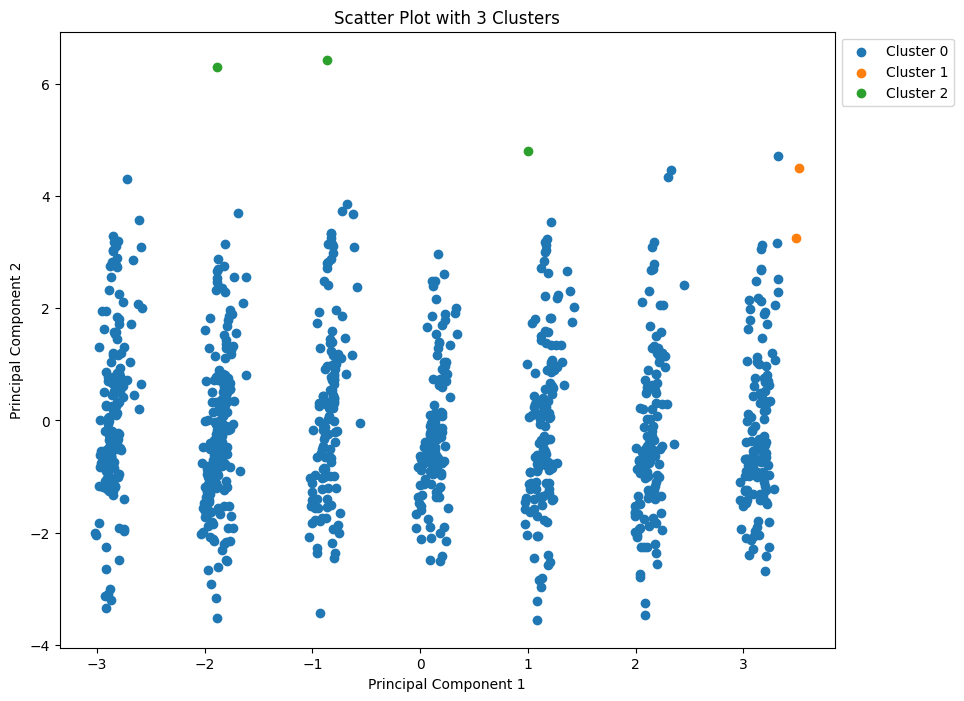

The average silhouette_score is: 0.33975225809806525


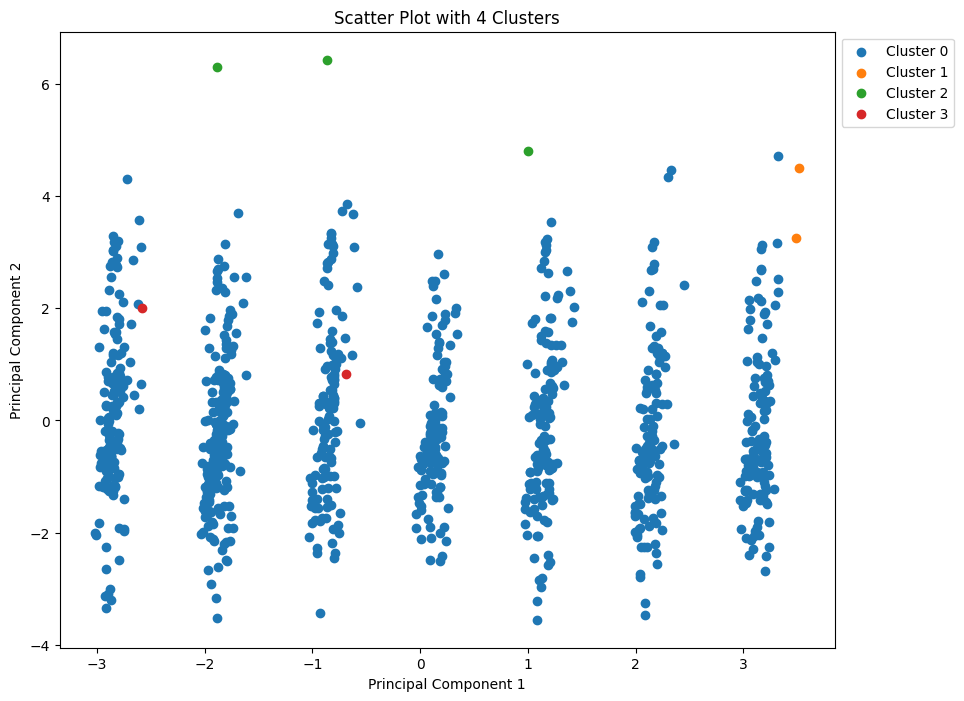

The average silhouette_score is: 0.276543651274523


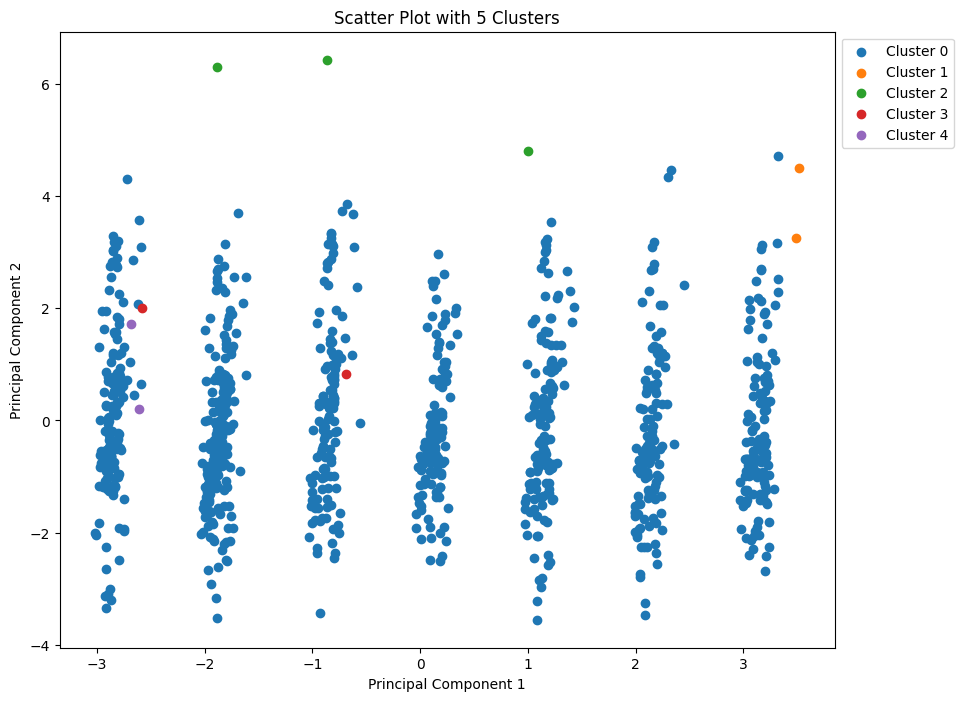

The average silhouette_score is: 0.2151194916772291


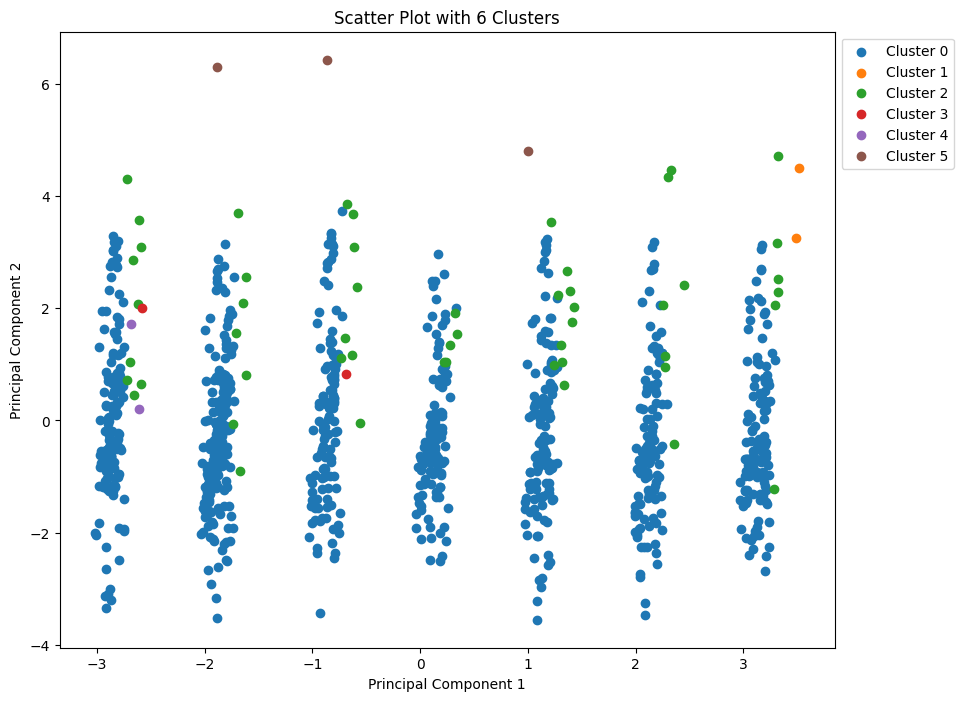

The average silhouette_score is: 0.21409167791613437


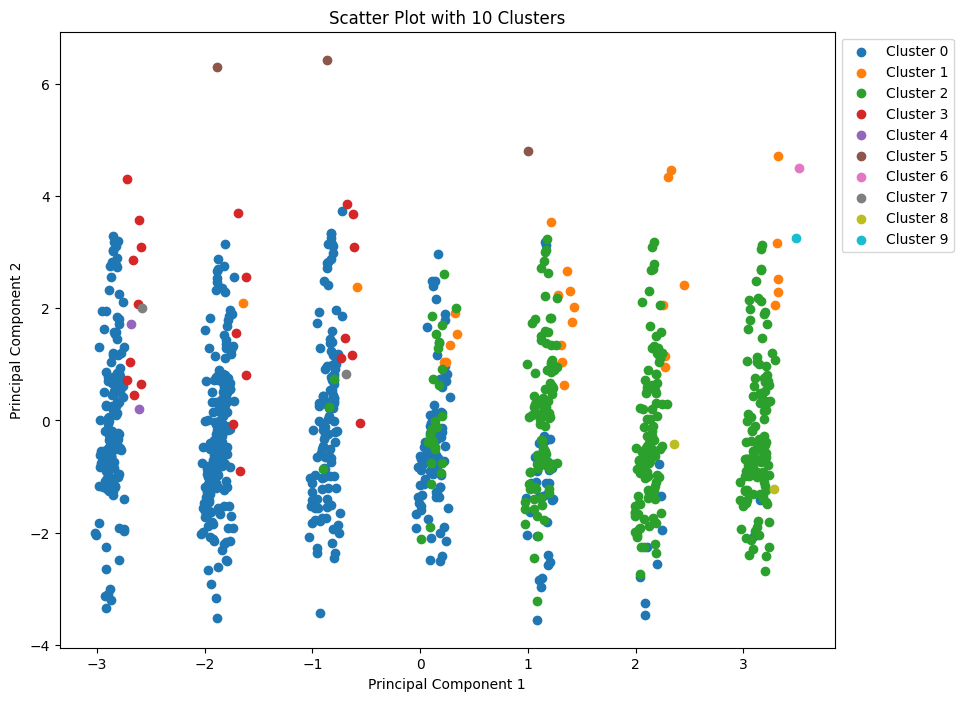

The average silhouette_score is: 0.1434721609866386


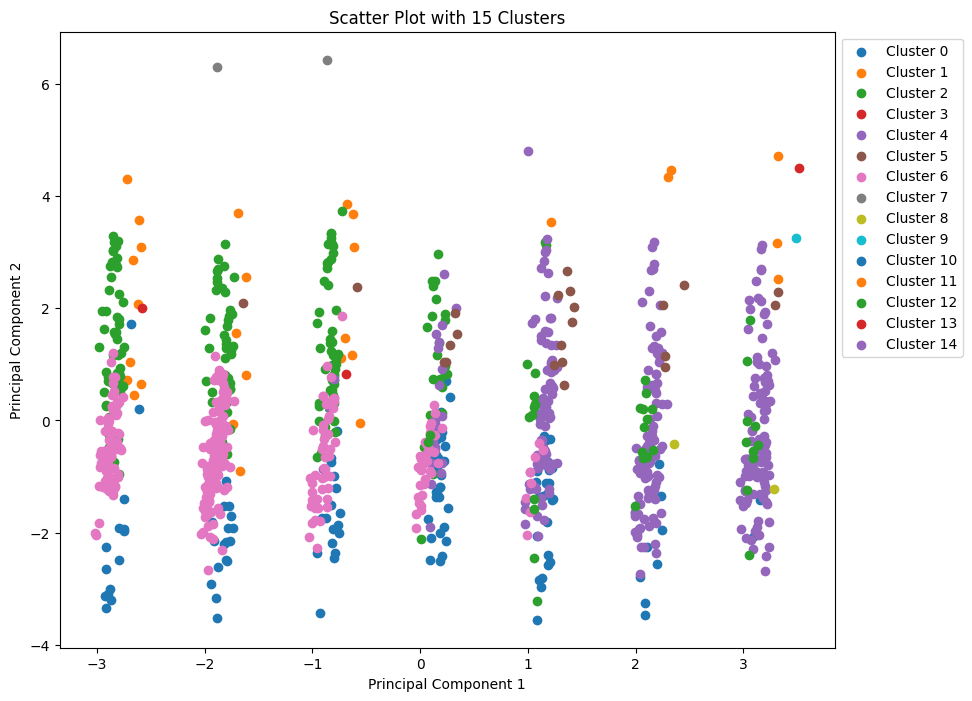

The average silhouette_score is: 0.10439325169946428


In [25]:
# perform agglomerative clustering with variable number of clusters using average linkage
agg_cluster([3, 4, 5, 6, 10, 15], prepared_X, sample_size=1000, linkage='average')

Agglomerative clustering between 3 and 6 clusters does not show much variance or suggest distinct clusters. In all four scenarios, there seems to be one dominating cluster as the majority of the observations appear to span all values of the first principal component. As we increase the number of clusters to 10 and 15, the groupings become more globular thus they are easier to identify; however comparing and interpreting the differences between more clusters becomes more cumbersome and the silhouette scores decreases, suggesting that the observations are not  matched as well to their own clusters. We will try a different linkage technique and compare results.

Single linkage clustering defines the distance between two clusters as the minimum distance between any single data point in the first cluster and any single data point in the second cluster; thus it is good at handling non-globular cluster shapes but it is more sensitive to outliers than average linkage.

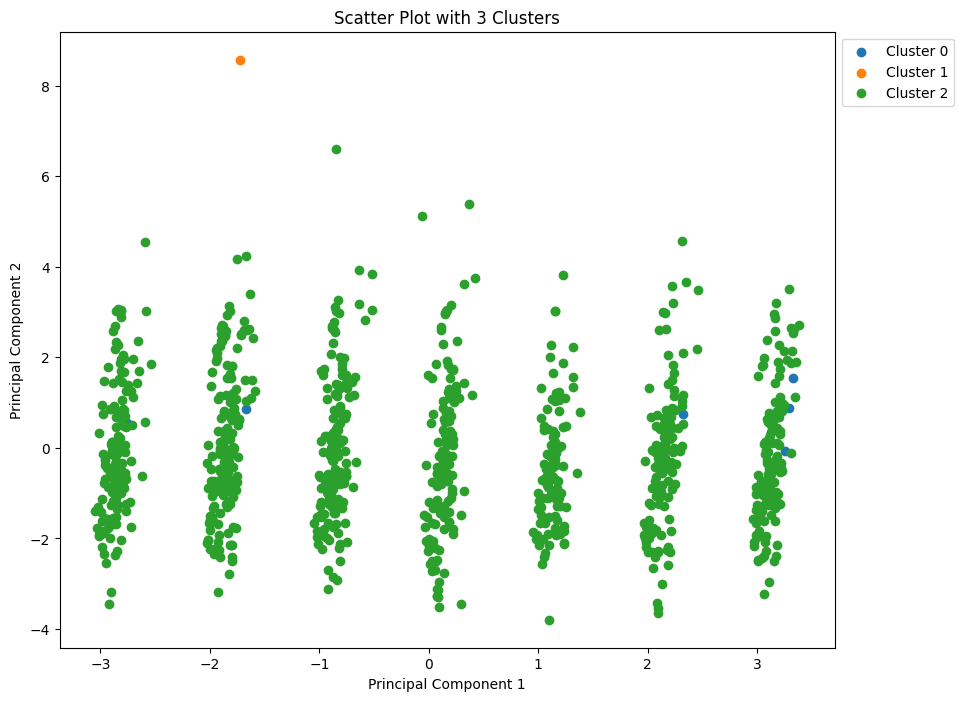

The average silhouette_score is: 0.32585069926914023


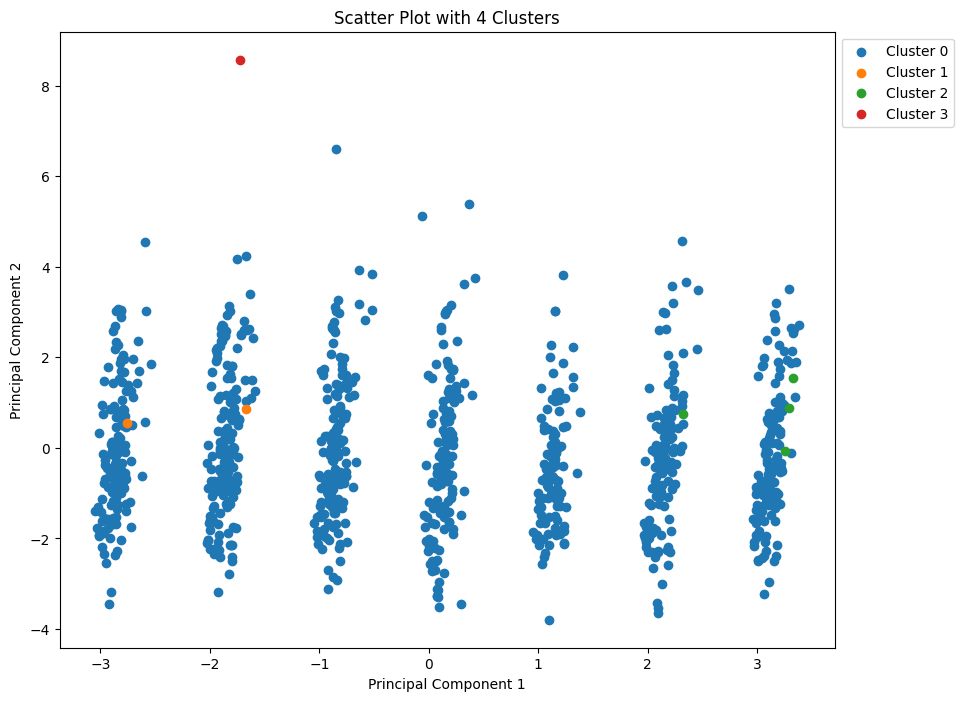

The average silhouette_score is: 0.2757911326267356


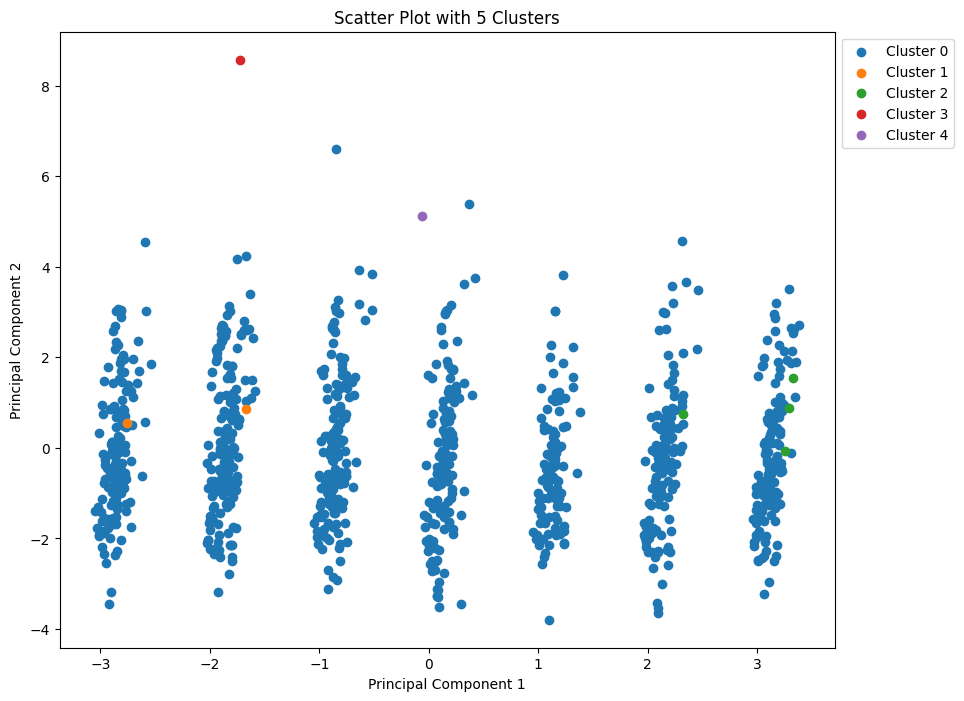

The average silhouette_score is: 0.25652455344970454


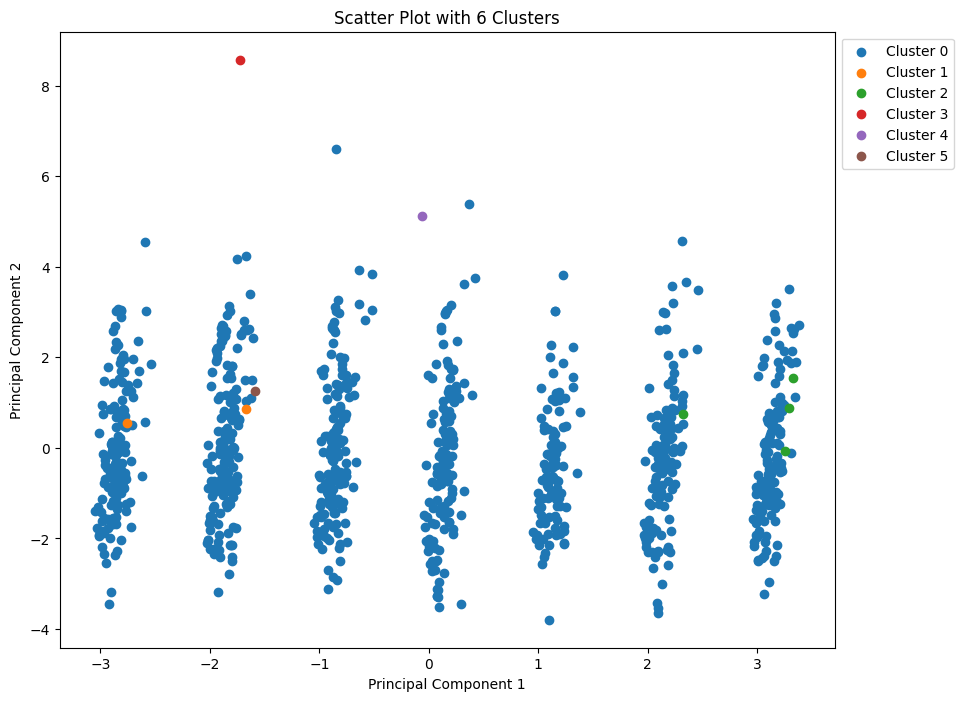

The average silhouette_score is: 0.17149570628898517


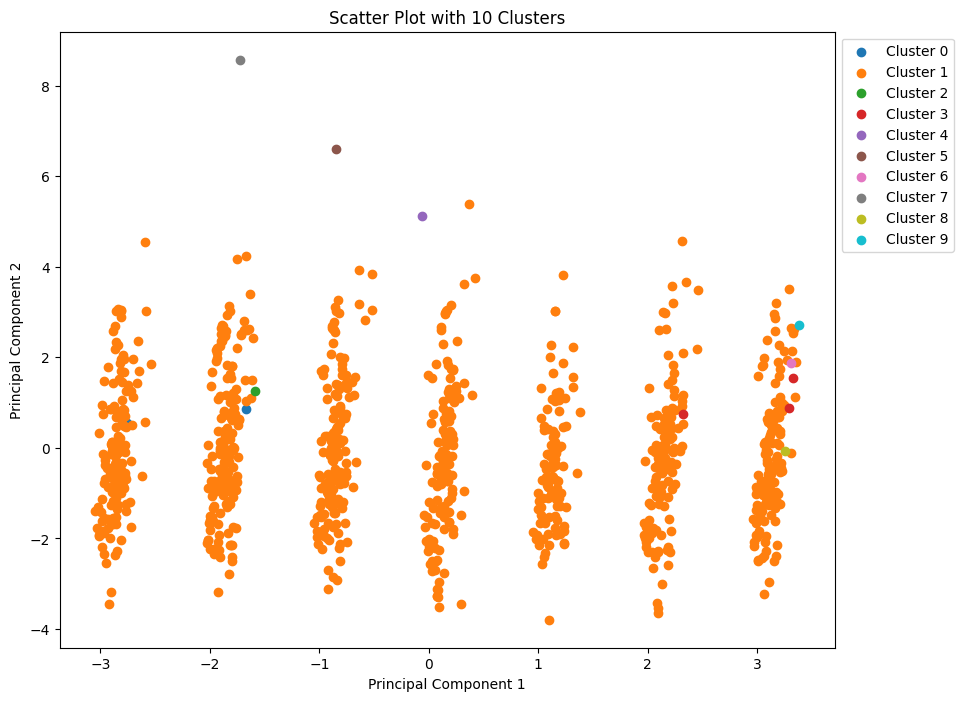

The average silhouette_score is: 0.11480094381756402


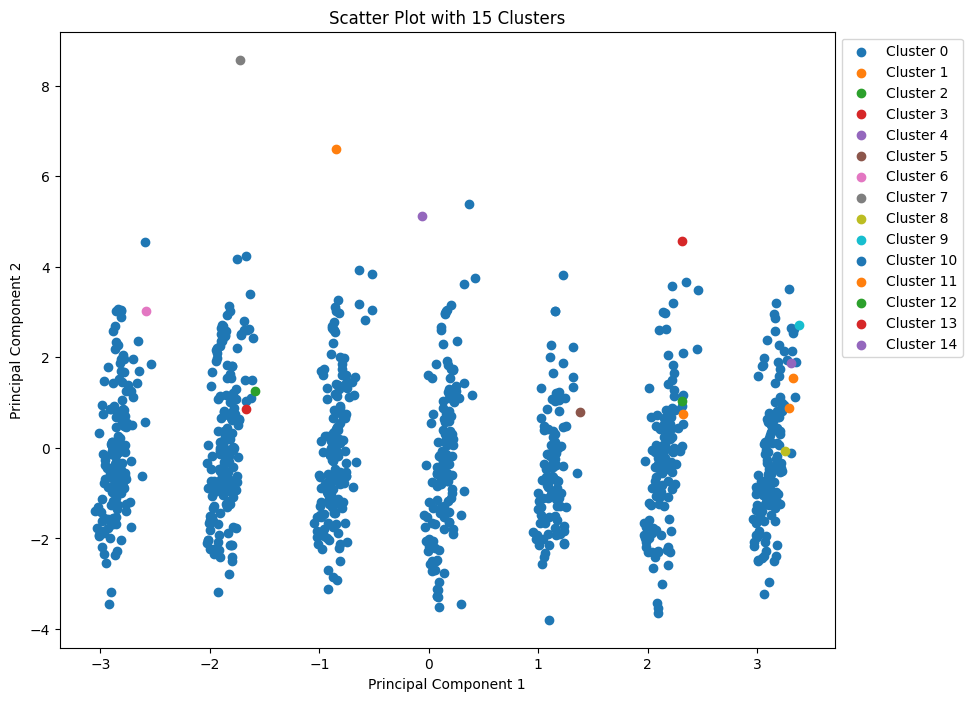

The average silhouette_score is: 0.07100903234034218


In [26]:
# perform agglomerative clustering with variable number of clusters using ward linkage
agg_cluster([3, 4, 5, 6, 10, 15], prepared_X, sample_size=1000, linkage='single')

Similar to average linkage, agglomerative clustering with single linkage between 3 and 6 clusters does not show much variance or suggest distinct clusters. Additionally, the silhouette score decreases as more clusters are added and we should note that the silhouette score for three clusters using single linkage is greater than average linkage. Unlike average linkage, the groupings remain quite consistent and do not become more globular as we increase the number of clusters to 10 and 15. Now we will try K-means clustering.

### K-Means Clustering

Since the algorithm behind K-means is less complex, this method of clustering is better suited for larger datasets as we have here. Unfortunately, K-means simplified nature assumes clusters are spherical and of similar size, makeng it less flexible in identifying clusters of arbitrary shapes.

In [27]:
# PCA pipeline for 2 dimensions
pca = PCA(n_components=2)

# perform 2D PCA on transformed data
principalComponents = pca.fit_transform(df_transformed) 

# create dataFrame to hold the first and second principal components
principalDf = pd.DataFrame(data = principalComponents, 
                  columns = ['principal component 1', 'principal component 2'])

In [28]:
# Assuming principalDf is a DataFrame containing your PCA components
pca_X = principalDf.values

# This will check if pca_X contains only numbers
if np.issubdtype(pca_X.dtype, np.number):
    print("pca_X is all numeric")
else:
    raise TypeError("pca_X contains non-numeric data types.")

# Initialize a range of clusters from 2 to 6
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and set n_init to a numeric value, random_state for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(pca_X)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(pca_X, cluster_labels)
    print("For", n_clusters, "clusters, the average silhouette_score is:", silhouette_avg)

pca_X is all numeric
For 2 clusters, the average silhouette_score is: 0.42944848559581006
For 3 clusters, the average silhouette_score is: 0.3917126794972525
For 4 clusters, the average silhouette_score is: 0.36557863562801657
For 5 clusters, the average silhouette_score is: 0.3673173628414104
For 6 clusters, the average silhouette_score is: 0.35174307339836375


In [31]:
# PCA pipeline for 20 dimensions
pca = PCA(n_components=20)

# Perform PCA on transformed data
principalComponents = pca.fit_transform(df_transformed)

# Create DataFrame to hold the principal components
columns = [f'principal component {i+1}' for i in range(20)]
principalDf = pd.DataFrame(data = principalComponents, columns = columns)

pca_X = principalDf.values

# This will check if pca_X contains only numbers
if np.issubdtype(pca_X.dtype, np.number):
    print("pca_X is all numeric")
else:
    raise TypeError("pca_X contains non-numeric data types.")

# Initialize a range of clusters from 2 to 6
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and set n_init to a numeric value, random_state for reproducibility
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    cluster_labels = clusterer.fit_predict(pca_X)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(pca_X, cluster_labels)
    print(f"For {n_clusters} clusters, the average silhouette_score is: {silhouette_avg}")

pca_X is all numeric
For 2 clusters, the average silhouette_score is: 0.17383593331138864
For 3 clusters, the average silhouette_score is: 0.18772623778431824
For 4 clusters, the average silhouette_score is: 0.16036211506503117
For 5 clusters, the average silhouette_score is: 0.14311599818508158
For 6 clusters, the average silhouette_score is: 0.1377841535938005


Text(0.5, 0.98, 'Silhouette analysis for KMeans clustering on sample data with n_clusters = 2')

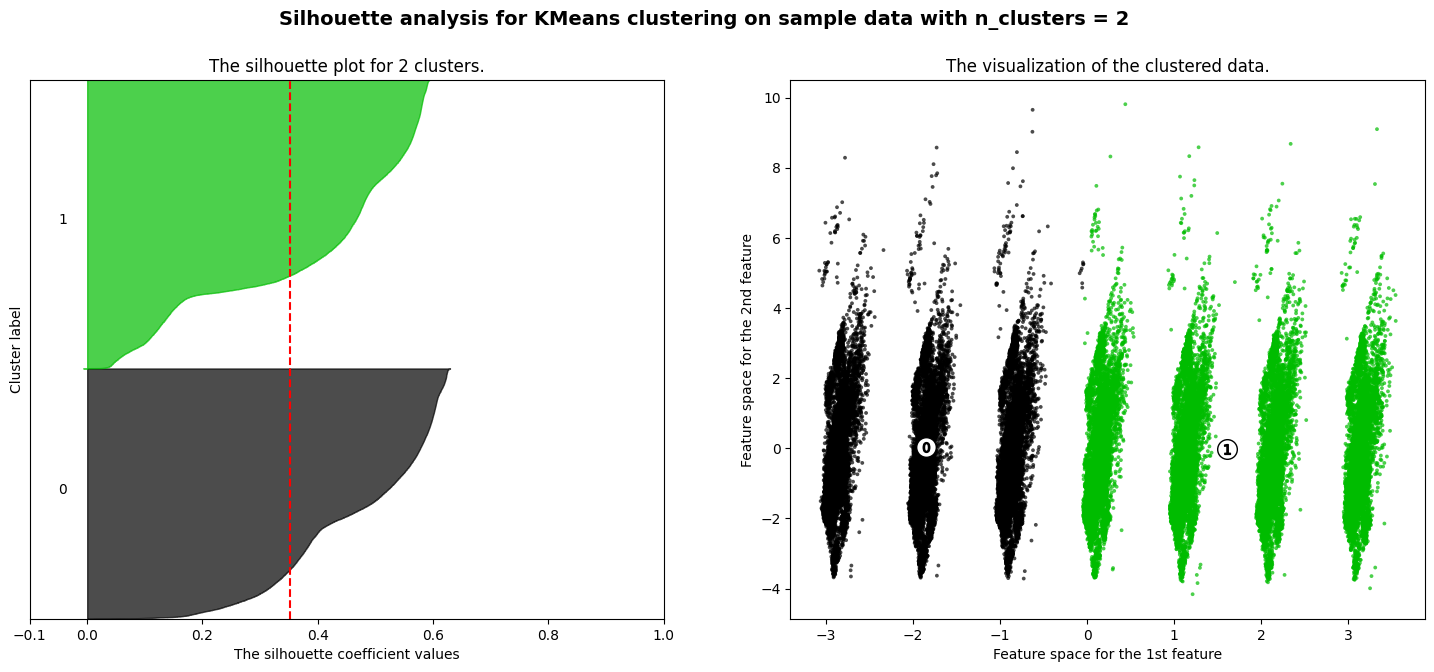

In [29]:
# set n_clusters to optimal number of clusters
n_clusters = 2

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Initialize the clusterer with n_clusters value and a random generator
# seed of 42 for reproducibility
clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
cluster_labels = clusterer.fit_predict(pca_X)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1 to 1 but here they do not appear
# to exceed -0.05
ax1.set_xlim([-0.1, 1])

# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(pca_X) + (n_clusters + 1) * 10])

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(pca_X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values\
                                    [cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                    0, ith_cluster_silhouette_values,
                    facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples


ax1.set_title("The silhouette plot for 2 clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(pca_X[:, 0], pca_X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                "with n_clusters = %d" % n_clusters),
                fontsize=14, fontweight='bold')

In [30]:
# print the means for each cluster across numerical attributes in dataset
clusters = pd.DataFrame({'cluster': cluster_labels})
df_clusters = pd.concat([df,clusters], axis=1)
df_clusters.groupby('cluster')[numeric_cols].mean().transpose()

cluster,0.0,1.0
latitude,38.246968,38.163573
longitude,-95.501417,-95.908097
days_between,1189.437677,1141.338675
Day,14.961389,14.690757
Month,6.433906,6.520075
Year,2004.072755,2003.983126
lat_rounded,38.246883,38.163642
lon_rounded,-95.501267,-95.908055
Total_Alien_Books,36.361561,35.054547
Total_Meteorites,853.951132,868.577429


The analysis of cluster attributes through their mean values across various numerical attributes reveals distinct patterns and differences in geographical, temporal, and cultural characteristics among the two clusters identified in the dataset.

Geographical Attributes:

Geographically, the clusters differ slightly in both latitude and longitude: Cluster 1 is centered at a latitude of 38.164 and a longitude of -95.908, whereas Cluster 2 is positioned more easterly at 38.247 latitude and -95.501 longitude. This eastward shift in Cluster 2 might indicate regional variations in sighting reports, which could be influenced by factors such as population density, accessibility to reporting tools, or regional interest in UFO phenomena.

Temporal Attributes:

In terms of temporal patterns, there are small but notable differences. The average days between sightings are slightly higher in Cluster 2 (1189 days) compared to Cluster 1 (1141 days), suggesting a lower frequency of reported sightings or possibly a more sporadic occurrence in Cluster 2. This could be linked to regional activities or differences in public awareness and reporting mechanisms. The reporting dates (Day, Month, Year) show very minimal differences, indicating that the temporal distribution of sightings within each year is fairly consistent across both clusters.

Cultural influences:

Culturally, the clusters show variation in the engagement with alien-related content. Cluster 2 records a higher average number of alien-themed books (36.36) compared to Cluster 1 (35.05), which could suggest a greater cultural influence or interest in alien phenomena in Cluster 2. Interestingly, the total meteorite sightings are slightly higher in Cluster 1, which could indicate a regional interest in astronomical events that may be correlated with UFO sightings. The attribute 'contains_light', representing reports mentioning 'light' or 'lights', is almost identical in both clusters, suggesting a common visual element in sightings regardless of the cluster. 

These distinctions help to understand how different factors like geography, time, and culture play roles in the reporting and perception of UFO phenomena across different regions.

## Parameter Optimization and Method Tuning

This code configures a Principal Component Analysis (PCA) with twenty dimensions to transform a dataset, ensuring that the dimensionality reduction retains significant variance. This is quantified by calculating the percentage of variance retained by each principal component, which is crucial for understanding the data's explained variability. 

This code also features clustering techniques, including agglomerative clustering with variable Kmeans cluster numbers and linkage methods. Each clustering execution is optimized by setting specific parameters such as the number of initializations (n_init) and ensuring reproducibility with a fixed random_state. 

## Performance Evaluation and Metric Selection

Since we do not have true cluster labels, we can compare and evaluate our three clustering attempts using silhouette score, which assesses the consistency within clusters. In all the agglomerative clustering scenarios, three clusters seem to result in the greatest silhouette coefficient. Additionally, agglomerative clustering with single linkage appeared to perform better than agglomerative clustering with average linkage as suggested by its initial silhouette scores but this pattern is not maintained as we increase the number of clusters to 10 and 15. 

Overall, K-means clustering resulted in much greater silhouette scores than either agglomerative clustering procedures, thus we proceeded to optimize the selection of the number of clusters based on the highest silhouette scores achieved. This methodical approach to parameter optimization and method tuning ensures that the PCA and clustering analyses are both robust and insightful, leading to more reliable and interpretable outcomes from the data.

## Project Reflection 

Throughout the project, we considered various perspectives to explore and analyze the patterns behind UFO sightings. From an astronomer's viewpoint, we established a statistically significant, positive correlation between the frequency of UFO sightings and meteorite landings. This finding might suggest a heightened public awareness or sensitivity to aerial phenomena following meteorite events, although causality cannot be inferred directly. The skew in our data towards recent years prompted a deeper examination into potential biases, particularly the overrepresentation of events in the Northern Hemisphere, which could distort our understanding of global phenomena. Future studies could aim to balance geographical data sources and delve deeper into the impact of space-related activities on UFO sightings.

From a meteorologist's perspective, the analysis highlighted a significant variance in UFO sightings across different seasons, with summer and winter showing notable differences in sighting frequencies. This could be attributed to variations in weather conditions such as humidity and visibility, which are known to affect sensory perceptions. However, while temperature itself was not a significant factor, the seasonal analysis underscores the need for a more nuanced understanding of how environmental conditions influence public observations and reporting of unexplained aerial phenomena. Future research should consider longitudinal weather data and its interaction with human activities to better predict periods of increased sightings.

Lastly, from an anthropologist's angle, the correlation between UFO sightings and the popularity of alien-themed media was substantiated. This suggests that cultural factors significantly shape perceptions and reporting of UFOs, reflecting broader societal influences on scientific observation. Surprisingly, the expected positive relationship between hallucinogenic drug use and UFO sightings was not supported; instead, a negative correlation emerged, indicating that our initial hypothesis about perception-altering substances might have been oversimplified. This counterintuitive finding highlights the complexity of human psychology and its influence on interpreting unusual experiences. Future studies could benefit from a broader demographic analysis and deeper psychological profiling to explore how different substances and cultural contexts affect the reporting of extraordinary events. Overall, the project opens up several avenues for interdisciplinary research, combining data analytics with socio-cultural and environmental studies to build a comprehensive understanding of phenomena like UFO sightings.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a95c9e9-3cb6-41d1-9181-3dc8f009dd81' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>